In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data
def load_data():
    data = np.array(np.genfromtxt('wavy_data.csv', delimiter=','))
    data = np.random.permutation(data)
    data_s = np.split(data, 3)
    train_x = np.concatenate([data_s[0][:,0] ,data_s[1][:,0]])
    train_y = np.concatenate([data_s[0][:,1] ,data_s[1][:,1]])
    test_x = data_s[2][:,0]
    test_y = data_s[2][:,1]
    return train_x, train_y, test_x, test_y

In [3]:
train_x, train_y, test_x, test_y = load_data()

In [4]:
# YOUR CODE GOES HERE takes poly features of the input 
def poly_features(x,D):
    F = np.zeros((len(x), D))
    for i in np.arange(len(x)):
        temp = 1
        for j in np.arange(D):
            F[i, j] = temp * x[i]
            temp = temp * x[i]
    F = F.T
    return F

In [5]:
# plot mse's over all D tested 
def plot_mse(train_mses, test_mses, deg):
    plt.plot(np.arange(1,np.size(train_mses)+1),train_mses,'ro--', color = 'yellow', label = 'train_mses')
    plt.plot(np.arange(1,np.size(test_mses)+1),test_mses,'ro--', color = 'blue', label = 'test_mses')
    plt.title('MSE on entire dataset in D', fontsize=18)
    plt.xlabel('degree D', fontsize=18)
    plt.ylabel('MSE       ', fontsize=18)
    plt.legend()

In [6]:
# run over all the degrees, fit each models, and calculate errors
def try_all_degs(train_x, train_y, test_x, test_y, deg_range):
    # generate nonlinear features
    train_mses, test_mses = [], []

    for D in np.arange(0,np.size(deg_range)):
        # generate poly feature transformation
        train_F = poly_features(train_x,deg_range[D])
        test_F = poly_features(test_x,deg_range[D])

        # get weights for current model
        train_temp = np.linalg.pinv(np.dot(train_F,train_F.T))
        test_temp = np.linalg.pinv(np.dot(test_F,test_F.T))
        w = np.dot(np.dot(train_temp,train_F),train_y)
        train_MSE = np.linalg.norm(np.dot(train_F.T,w)-train_y)/np.size(train_y)
        test_MSE = np.linalg.norm(np.dot(test_F.T,w)-test_y)/np.size(test_y)
        
        train_mses.append(train_MSE)
        test_mses.append(test_MSE)
    # make plot of mse's
    fig = plt.figure(figsize = (7,7))
    plot_mse(train_mses, test_mses,deg_range)
    plt.show()

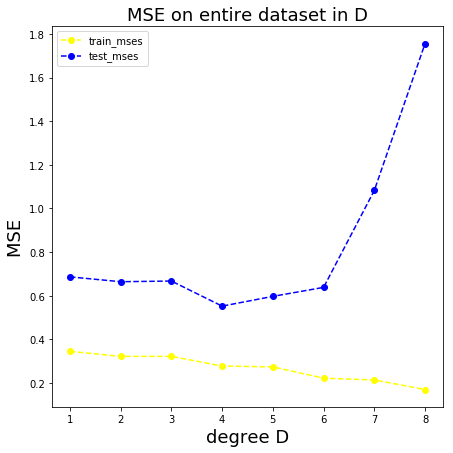

In [7]:
try_all_degs(train_x, train_y, test_x, test_y, [1,2,3,4,5,6,7,8])